# 行うこと

- ライブラリーの読み込みとバージョンの確認
- データの読み込みと加工
- トレーニングデータとテストデータの分割
- 学習
- 結果の確認
- 重要度解析
- その他に検討する項目

# ライブラリーの読み込みとバージョンの確認

In [1]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools
print(rdBase.rdkitVersion)

2021.09.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
import urllib.request # URLで指定したファイルをダウンロードするライブラリ

url = 'http://modem.ucsd.edu/adme/data/databases/logS/data_set.dat'
urllib.request.urlretrieve(url, 'water_solubility.txt') 

('water_solubility.txt', <http.client.HTTPMessage at 0x29f52179100>)

In [4]:
df = pd.read_csv('water_solubility.txt', sep='\t', header=None, names = ["smiles", "CAS", "logS"]) # データの読み込み


In [5]:
PandasTools.AddMoleculeColumnToFrame(df, "smiles")

In [6]:
df.dtypes

smiles     object
CAS        object
logS      float64
ROMol      object
dtype: object

,smiles,CAS,logS,ROMol
0,O=C(C)N,60-35-5,1.58,
1,NNC,60-34-4,1.34,
2,O=C(C)O,64-19-7,1.22,

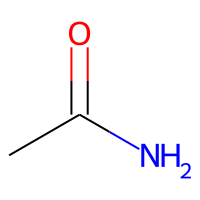
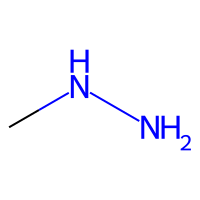
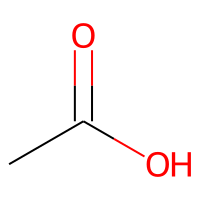

In [7]:
df.head(3)

# データの読み込みと加工 (finger printの作成)

In [8]:
df = df.drop(175, axis=0)

,smiles,CAS,logS,ROMol
170,O=C(C)Nc1ccc(cc1)N,122-80-5,-0.98,
171,O=C1C=CC(=O)C=C1,106-51-4,-0.99,
172,COCCCC,628-28-4,-0.99,
173,IC,74-88-4,-1.00,
174,CCCC(C)(CC)O,597-96-6,-1.00,
176,CC(=O)Nc1ccc(cc1)O,103-90-2,-1.03,
177,C1c2c(cccc2)NC1,496-15-1,-1.04,
178,O=C1C(=CNC(=O)N1)F,51-21-8,-1.07,
179,CCCCC(C)(C)O,625-23-0,-1.08,
180,c1c(Br)ccc(c1)O,106-41-2,-1.09,

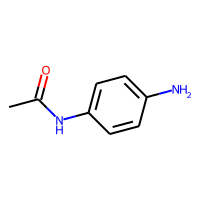
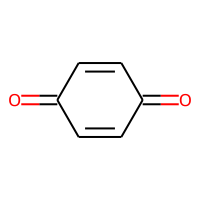
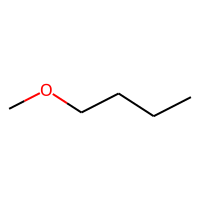
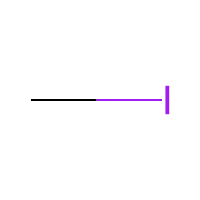
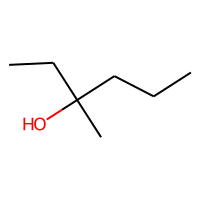
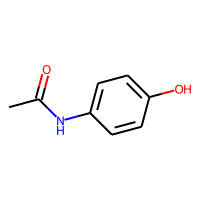
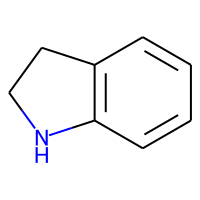
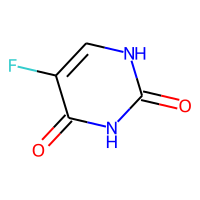
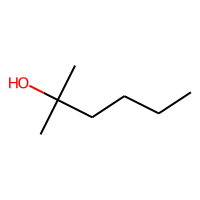
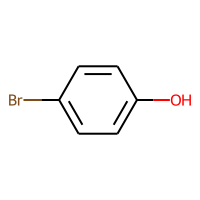

In [9]:
df[170:180] # 読み込んだデータの確認

In [10]:
df = df.reset_index()

In [11]:
import numpy as np

fingerprints = []
safe = []
for mol_idx, mol in enumerate(df["ROMol"]):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
        
    except:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
df_fp = pd.DataFrame(fingerprints)

(1289, 2048)


In [12]:
df_fp[170:180]

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,index,smiles,CAS,logS,ROMol,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,O=C(C)N,60-35-5,1.58,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,NNC,60-34-4,1.34,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,O=C(C)O,64-19-7,1.22,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,N1CCCC1,123-75-1,1.15,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,O=C(N)NO,127-07-1,1.12,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1285,Clc1c(c2c(ccc(Cl)c2Cl)Cl)c(ccc1Cl)Cl,38411-22-2,-8.65,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,1286,c1c2c(ccc3c2cccc3)cc2c1ccc1ccccc12,53-70-3,-8.66,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,1287,c1c2c3cccc4ccc5ccc6c(c2c(cc6)cc1)c5c43,191-24-2,-9.03,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1287,1288,Clc1c(Cl)c(c2cc(c(c(Cl)c2Cl)Cl)Cl)c(c(c1Cl)Cl)Cl,40186-72-9,-10.26,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0

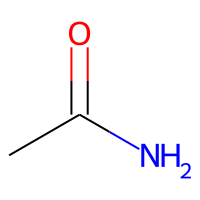
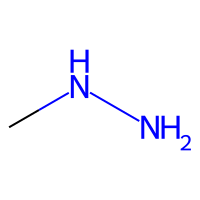
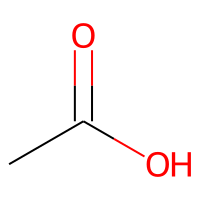
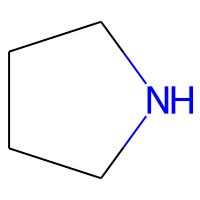
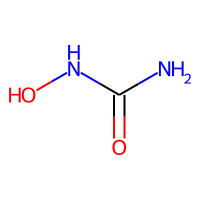
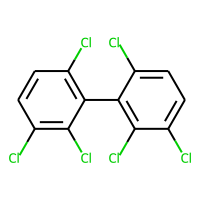
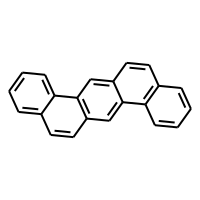
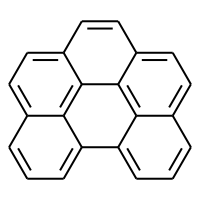
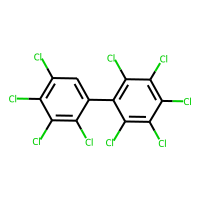
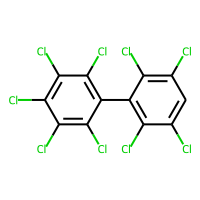

In [13]:
df_comb = df.join(df_fp)
df_comb 

# トレーニングデータとテストデータの分割

In [14]:
X = df_fp

In [15]:
y = df['logS']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
X_train = X_train.sort_index()
X_train

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_test = X_test.sort_index()
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_train = y_train.sort_index()
y_train

0        1.58
1        1.34
2        1.22
3        1.15
4        1.12
        ...  
1283    -8.60
1284    -8.65
1285    -8.66
1286    -9.03
1287   -10.26
Name: logS, Length: 1160, dtype: float64

In [19]:
y_test = y_test.sort_index()
y_test

7        1.10
11       1.07
31       0.57
35       0.48
43       0.32
        ...  
1249    -5.46
1253    -5.80
1254    -5.89
1256    -6.02
1288   -10.41
Name: logS, Length: 129, dtype: float64

# 学習

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 100, n_estimators = 500, n_jobs = -1, random_state = 100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=500, n_jobs=-1,
                      random_state=100)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
score = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(score)
print(f'rmse: {rmse:.4f}')
score2 = r2_score(y_test, y_pred)
print("R2", score2)
y_predtrain = model.predict(X_train)

rmse: 0.9585
R2 0.794712452048112


In [22]:
y_predtrain = y_predtrain.reshape(-1, 1)
y_predtrain = pd.DataFrame(y_predtrain)
y_predtrain

,0
0,0.98820
1,0.55908
2,0.73486
3,0.77757
4,0.76450
...,...
1155,-7.61320
1156,-7.35270
1157,-7.26858
1158,-8.40412


# 結果の確認

In [23]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(model, X_train, y_train, scoring ='neg_mean_squared_error', cv = 10)

In [24]:
cross_validation = cross_validation * -1
cross_validation

array([2.96691435, 1.07286643, 0.63975377, 0.85514998, 0.98586628,
       1.78400882, 4.20365632, 0.90112125, 0.63356881, 2.49829557])

In [25]:
rmse = np.mean(np.sqrt(cross_validation))
print('RMSE_CV')
print(rmse)

RMSE_CV
1.2187557369260615


In [26]:
y_test

7        1.10
11       1.07
31       0.57
35       0.48
43       0.32
        ...  
1249    -5.46
1253    -5.80
1254    -5.89
1256    -6.02
1288   -10.41
Name: logS, Length: 129, dtype: float64

In [27]:
y_pred = pd.Series(y_pred)
y_test.reset_index(inplace=True, drop=True)
rf_plot = pd.concat([y_test, y_pred], axis = 1)
rf_plot.columns = ['y_test', 'y_pred']
rf_plot

,y_test,y_pred
0,1.10,-0.789400
1,1.07,0.653910
2,0.57,-0.366320
3,0.48,-0.851920
4,0.32,-0.252900
...,...,...
124,-5.46,-4.002275
125,-5.80,-4.395840
126,-5.89,-5.267340
127,-6.02,-6.063240


In [28]:
y_train.reset_index(inplace=True, drop=True)
rf_plot2 = pd.concat([y_train, y_predtrain], axis = 1)
rf_plot2.columns = ['y_train', 'pred']
rf_plot2

,y_train,pred
0,1.58,0.98820
1,1.34,0.55908
2,1.22,0.73486
3,1.15,0.77757
4,1.12,0.76450
...,...,...
1155,-8.60,-7.61320
1156,-8.65,-7.35270
1157,-8.66,-7.26858
1158,-9.03,-8.40412


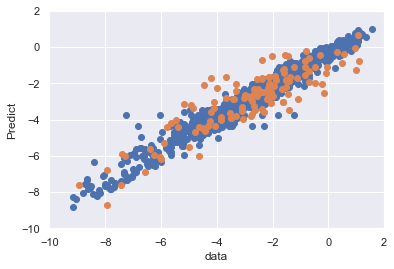

In [29]:
plt.figure()

x1 = rf_plot2.y_train.astype(float)
y1 = rf_plot2.pred.astype(float)

plt.scatter(x1, y1)

plt.xlim(-10, 2)
plt.ylim(-10, 2)

plt.xlabel('data')
plt.ylabel('Predict')

x2 = rf_plot.y_test.astype(float)
y2 = rf_plot.y_pred.astype(float)

plt.scatter(x2, y2)

plt.show()

# 重要度解析

,feature,feature_importance
561,561,1.493933e-01
1087,1087,6.362906e-02
807,807,4.151840e-02
1380,1380,3.856461e-02
1143,1143,3.366034e-02
...,...,...
1806,1806,2.521278e-08
1559,1559,1.128242e-08
765,765,9.253885e-09
369,369,5.562046e-09


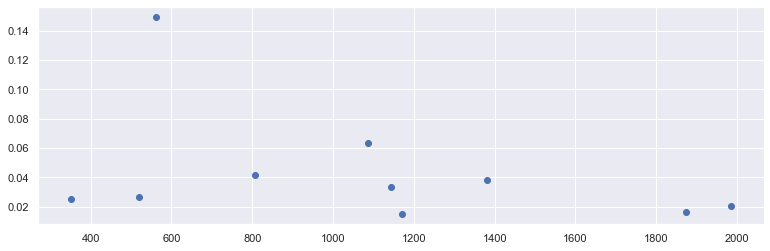

In [30]:
plt.rcParams["figure.figsize"] = [13,4]
fi_rf = model.feature_importances_  
features_rf = pd.DataFrame({'feature': list(X_train.columns),
                            'feature_importance': fi_rf[:]}).sort_values('feature_importance', ascending = False)
features_rf = features_rf[features_rf['feature_importance'] != 0]
plt.scatter(features_rf.iloc[:10, :].feature, features_rf.iloc[:10, :].feature_importance);
features_rf

# 学習結果から考えることや検討項目など

1. 化合物の表現方法として、フィンガープリント以外にもさまざまな「化学構造記述子」がある。

2. 機械学習手法として、ランダムフォレスト以外にも色々な手法がある。

3. パラメータ調節方法として、グリッドサーチやベイズ最適化などの方法がある。

4. 機械学習で注意すべき点として「過学習」という現象があり、それを防ぐための方法論として「交差検定」などがある。検定方法にも複数種類がある。

5. 外れ値の検証などを行いモデルの精度を高める。

6. 重要だった指標の可視化などを行い解釈性を高める。